## Visualise image-specific class saliency with backpropagation

In [1]:
import matplotlib.pyplot as plt

import torch
import torchvision.models as models

from torchscope.utils import (apply_transforms,
                              denormalize,
                              format_for_plotting,
                              load_image,
                              normalize,
                              visualize)

from torchscope.utils import ImageNetIndex

from torchscope.saliency import Backprop

### 1. Load an image 

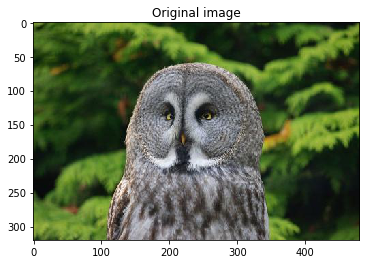

In [2]:
image = load_image('./images/great_grey_owl_01.jpg')

plt.imshow(image)
plt.title('Original image');

### 2. Load a pre-trained Model

In [3]:
model = models.alexnet(pretrained=True)

### 3. Create an instance of Backprop with the model

In [4]:
backprop = Backprop(model)

### 4. Calculate the gradients of a target class w.r.t the input image

By default, we return the gradients of all the colour channel.

You can also specify to return a max gradients across the colour channel via `take_max=True` flag, as this was what the authors did in the [paper](https://arxiv.org/pdf/1312.6034.pdf) and sometimes it renders better for visualisation.

In [5]:
imagenet = ImageNetIndex()
target_class = imagenet['great grey owl']

input_ = apply_transforms(image)

# Calculate the gradients of each pixel w.r.t. the input image

gradients = backprop.calculate_gradients(input_, target_class)

# Or, take the maximum of the gradients for each pixel across colour channels.

max_gradients = backprop.calculate_gradients(input_, target_class, take_max=True)

print('Shape of the gradients:', gradients.shape)
print('Shape of the max gradients:', max_gradients.shape)

Shape of the gradients: torch.Size([3, 224, 224])
Shape of the max gradients: torch.Size([1, 224, 224])


### 5. Visualise the input image and gradients side-by-side

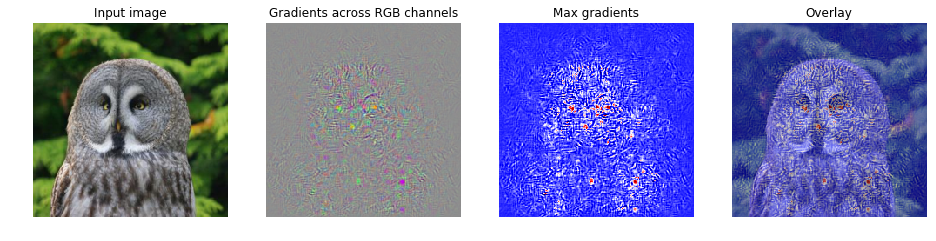

In [6]:
visualize(input_, gradients, max_gradients)

### 6. Visualise with _guided_ backprogation 

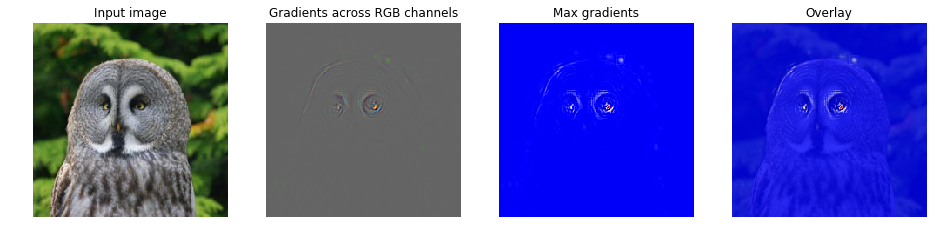

In [7]:
backprop = Backprop(model, guided=True)

guided_gradients = backprop.calculate_gradients(input_, target_class)
max_guided_gradients = backprop.calculate_gradients(input_, target_class, take_max=True)

visualize(input_, guided_gradients, max_guided_gradients, alpha=0.8)